# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [25]:
# Study data files
weather_data_path = "../Weatherpy/Weather_data_output.csv"

# Read the mouse data and the study results
weather_data = pd.read_csv(weather_data_path)

del weather_data['Unnamed: 0']

weather_data


,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,74.52,100,75,6.91,US,1626136351
1,puerto ayora,-0.7393,-90.3518,71.40,79,29,9.86,EC,1626136544
2,vanimo,-2.6741,141.3028,86.04,64,9,7.94,PG,1626136544
3,atuona,-9.8000,-139.0333,77.65,76,32,21.77,PF,1626136545
4,gravatai,-29.9444,-50.9919,64.18,100,83,4.61,BR,1626136545
...,...,...,...,...,...,...,...,...,...
504,gigmoto,13.7796,124.3900,84.83,76,96,3.53,PH,1626136733
505,klaksvik,62.2266,-6.5890,52.72,93,100,0.72,FO,1626136734
506,el banco,9.0011,-73.9758,82.27,69,5,1.05,CO,1626136734
507,ler,8.3018,30.1418,71.69,90,100,3.06,SS,1626136735


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [3]:
# Configure gmaps
gmaps.configure(api_key=g_key)

# Store latitude and longitude in locations
locations = weather_data[["Lat", "Lng"]]

# set humidity to weight and set as float
humidity = weather_data["Humidity"].astype(float)


In [4]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

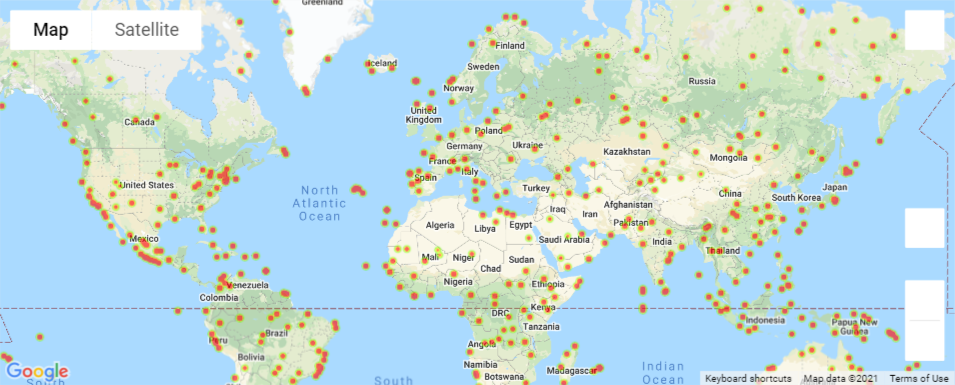

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [29]:
#Create new DataFrame fitting weather criteria
hotel_df = weather_data[(weather_data['Wind Speed'] < 10) & (weather_data['Cloudiness']==0) & (weather_data['Max Temp'] > 70) &
                           (weather_data['Max Temp'] < 80)]

hotel_df

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
30,policoro,40.2115,16.6726,78.60,88,0,2.48,IT,1626136555
166,marsa matruh,31.3525,27.2453,73.60,83,0,4.61,EG,1626136603
235,puerto del rosario,28.5004,-13.8627,76.75,61,0,8.05,ES,1626136629
272,hambantota,6.1241,81.1185,77.34,100,0,9.22,LK,1626136642
298,pimenta bueno,-11.6725,-61.1936,73.00,44,0,2.55,BR,1626136652
365,naples,40.8333,14.2500,78.13,82,0,1.14,IT,1626136678
378,surt,31.2089,16.5887,78.53,74,0,7.72,LY,1626136401
395,methoni,36.8197,21.7049,79.21,73,0,8.79,GR,1626136691
402,caravelas,-17.7125,-39.2481,70.74,80,0,4.97,BR,1626136693
408,beyneu,45.3167,55.2000,75.43,45,0,9.24,KZ,1626136696


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [ ]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

In [ ]:
# Add marker layer ontop of heat map


# Display figure
